# Car Emission

I'm going to investigate the car emission in the UK.

The business questions I'm thinking of are:
- Which companies have the most environmentally friendly cars?
- What factors are important in the asignment of a tax label?
- Does the emission decrease over time?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data.csv')
df.head()

C:\Users\pimvs\Documents\udacity-data-review\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN


# Warning columns

First of all, I'll have a look at the columns that gave me a warning:
```DtypeWarning: Columns (6,30) have mixed types.Specify dtype option on import or set low_memory=False.```

## Column 6: tax_band

In [2]:
df.columns[6] # check column name

'tax_band'

In [3]:
df['tax_band'].unique() # check unique values

array([nan, 'G', 'F', 'E', 'D', 'C', 'I', 'A', 'M', 'B', 'J', 'H', 'K',
       'L'], dtype=object)

Since labels A means environmentally most friendly and L means environmentally most unfriendly, it makes sense to map these labels to numbers.

In [4]:
label_mapping = { 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12 }
df['tax_band'] = df['tax_band'].map(label_mapping)
df['tax_band'].unique()

array([nan,  7.,  6.,  5.,  4.,  3.,  9.,  1.,  2., 10.,  8., 11., 12.])

## Column 30: date_of_change

In [5]:
df.columns[30]

'date_of_change'

In [6]:
print(df['date_of_change'].unique())

[nan '18 February 2004' '04 March 2003' '01 July 2001' '27 March 2003'
 '08 August 2003' '26 June 2003' '25 February 2004' '20 March 2003'
 '30 May 2003' '06 August 2003' '24 February 2004' '21 April 2004'
 '30 July 2003' '22 May 2003' '17 October 2003' '20 April 2004'
 '16 March 2004' '22 July 2003' '01 August 2003' '10 October 2003'
 '27 February 2004' '28 January 2004' '15 May 2003' '06 March 2003'
 '23 February 2004' '17 February 2004' '11 September 2003' '17 June 2003'
 '26 October 2001' '13 February 2004' '11 June 2003' '06 October 2003'
 '18 December 2003' '07 November 2003' '02 December 2002' '02 March 2004'
 '17 April 2002' '18 December 2001' '27 August 2002' '21 August 2002'
 '18 June 2003' '29 August 2002' '23 May 2003' '05 December 2003'
 '18 March 2004' '15 March 2002' '21 June 2002' '30 March 2004'
 '29 April 2003' '20 February 2003' '02 May 2003' '01 March 2004'
 '21 October 2003' '10 March 2003' '14 November 2001' '17 December 2001'
 '07 May 2003' '17 March 2004' '07 Ap

Since these are dates, we'll parse them

In [7]:
df['date_of_change'] = pd.to_datetime(df['date_of_change'])
df['date_of_change'].unique()

array([                          'NaT', '2004-02-18T00:00:00.000000000',
       '2003-03-04T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
       '2003-03-27T00:00:00.000000000', '2003-08-08T00:00:00.000000000',
       '2003-06-26T00:00:00.000000000', '2004-02-25T00:00:00.000000000',
       '2003-03-20T00:00:00.000000000', '2003-05-30T00:00:00.000000000',
       '2003-08-06T00:00:00.000000000', '2004-02-24T00:00:00.000000000',
       '2004-04-21T00:00:00.000000000', '2003-07-30T00:00:00.000000000',
       '2003-05-22T00:00:00.000000000', '2003-10-17T00:00:00.000000000',
       '2004-04-20T00:00:00.000000000', '2004-03-16T00:00:00.000000000',
       '2003-07-22T00:00:00.000000000', '2003-08-01T00:00:00.000000000',
       '2003-10-10T00:00:00.000000000', '2004-02-27T00:00:00.000000000',
       '2004-01-28T00:00:00.000000000', '2003-05-15T00:00:00.000000000',
       '2003-03-06T00:00:00.000000000', '2004-02-23T00:00:00.000000000',
       '2004-02-17T00:00:00.000000000', '2003-09-11

I've actually decided to drop this column as it doesn't add much to the data.

In [8]:
df = df.drop(columns=['date_of_change'])

# Numeric columns

In [9]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
numeric_columns

Index(['year', 'euro_standard', 'tax_band', 'engine_capacity', 'urban_metric',
       'extra_urban_metric', 'combined_metric', 'urban_imperial',
       'extra_urban_imperial', 'combined_imperial', 'noise_level', 'co2',
       'thc_emissions', 'co_emissions', 'nox_emissions', 'thc_nox_emissions',
       'particulates_emissions', 'fuel_cost_12000_miles',
       'fuel_cost_6000_miles', 'standard_12_months', 'standard_6_months',
       'first_year_12_months', 'first_year_6_months'],
      dtype='object')

In [10]:
df[numeric_columns].count()

year                      45511
euro_standard             45511
tax_band                   7515
engine_capacity           45504
urban_metric              45498
extra_urban_metric        45498
combined_metric           45504
urban_imperial            45498
extra_urban_imperial      45498
combined_imperial         45504
noise_level               45502
co2                       45511
thc_emissions             23190
co_emissions              45192
nox_emissions             40150
thc_nox_emissions          5430
particulates_emissions    14801
fuel_cost_12000_miles     33136
fuel_cost_6000_miles      12200
standard_12_months         3517
standard_6_months          2926
first_year_12_months       3517
first_year_6_months        1419
dtype: int64

The first 6 columns have no missing values, then there's the tax band, which we want to base our model on. Then there's about 12 columns with a few missing cell, and there's about 10 with a lot of missing values.

It's hard to say, but it seems like the columns with a lot of missing values aren't the most relevant, but there's no reason to remove them as it's possible to just fill them with averages. They will get diluted, but since they're not the most important ones, that doesn't matter too much.

In [11]:
numeric_columns = numeric_columns.drop('tax_band') # dropping tax_band column from list to fill
df[numeric_columns] = df[numeric_columns].fillna(df.mean()) # fill those columns with mean of column
df[numeric_columns].count()

year                      45511
euro_standard             45511
engine_capacity           45511
urban_metric              45511
extra_urban_metric        45511
combined_metric           45511
urban_imperial            45511
extra_urban_imperial      45511
combined_imperial         45511
noise_level               45511
co2                       45511
thc_emissions             45511
co_emissions              45511
nox_emissions             45511
thc_nox_emissions         45511
particulates_emissions    45511
fuel_cost_12000_miles     45511
fuel_cost_6000_miles      45511
standard_12_months        45511
standard_6_months         45511
first_year_12_months      45511
first_year_6_months       45511
dtype: int64

# Object colums

In [12]:
df.dtypes # check all dtypes

file                       object
year                        int64
manufacturer               object
model                      object
description                object
euro_standard               int64
tax_band                  float64
transmission               object
transmission_type          object
engine_capacity           float64
fuel_type                  object
urban_metric              float64
extra_urban_metric        float64
combined_metric           float64
urban_imperial            float64
extra_urban_imperial      float64
combined_imperial         float64
noise_level               float64
co2                         int64
thc_emissions             float64
co_emissions              float64
nox_emissions             float64
thc_nox_emissions         float64
particulates_emissions    float64
fuel_cost_12000_miles     float64
fuel_cost_6000_miles      float64
standard_12_months        float64
standard_6_months         float64
first_year_12_months      float64
first_year_6_m

In [13]:
df.select_dtypes(include=['object']).columns # get object columns

Index(['file', 'manufacturer', 'model', 'description', 'transmission',
       'transmission_type', 'fuel_type'],
      dtype='object')

## Column: file

In [14]:
df['file'].unique() # check data from file column

array(['DatapartC_july2000.csv', 'DataPartB_july2000.csv',
       'DataPartA_july2000.csv', 'Part_B_Euro_III_july2001.csv',
       'Part_C_Euro_II_july2001.csv', 'Part_A_Euro_IV_july2001.csv',
       'Part_B_Euro_III_may2002.csv', 'Part_A_Euro_IV_may2002.csv',
       'Part_C_Euro_II_may2002.csv', 'Part_B_Euro_III_may2003.csv',
       'Part_A_Euro_IV_may2003.csv', 'Part_B_Euro_III_latest.csv',
       'Part_A_Euro_IV_latest.csv', 'Part_B_Euro_III_may2005.csv',
       'Part_A_Euro_IV_may2005.csv', 'Part_A_Euro_IV_may2006.csv',
       'Part_B_Euro_III_may2006.csv', 'Part_A_Euro_IV_may2007.csv',
       'Part_B_Euro_III_may2007.csv', 'Part_A_Euro_IV_may2008.csv',
       'download-data-for-May-2009-Euro-4.csv',
       'download-data-for-May-2009-Euro-5.csv',
       'download-data-for-May-2010-Euro-5.csv',
       'download-data-for-May-2010-Euro-4.csv',
       'Euro 5 snapshot 2011.csv', 'Euro 4 snapshot 2011.csv',
       'Euro 6 snapshot 2011.csv',
       'download-data-for-Aug-2012-Euro-5.cs

I don't think this info is necessarily usefull, so I'll drop this table

## Column: manufacturer

In [15]:
df['manufacturer'].unique() # check data from file column

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lotus', 'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'],
      dtype=object)

I don't think this information will be usefull in our model, but it will be useful for further investigation of the data.

## Column: model

In [16]:
df['model'].unique().shape # check data from file column

(2649,)

That's a lot of dummies, so I'll leave it out, but I might try if the r2 scores are low

## Column: description

In [17]:
df['description'].unique().shape

(14989,)

Not usefull

## Column: transmission

In [18]:
df['transmission'].unique()

array(['M5', 'SAT5', 'M6', 'A4', 'A5', 'QM6', 'QA5', 'QM5', 'QM', 'QA',
       'FA5', 'FM5', 'FA4', 'A3', 'CVT', 'A', '4SS', 'M4', 'SAT 5', '5MT',
       '4AT', 'M5x2', 'M5/s', 'SM6', 'A6', 'MT', 'AT', 'M5N', 'A4L',
       'M5NE', 'A4NE', '3AT', '5MTx2', '4ATx2', 'A4x2', 'M', 'AV', 'QA6',
       'SS5', 'S/A6', 'M3', 'MTA', 'SAT6', 'Hybrid', 'QD6', 'D6',
       'A/SAT5', 'ASM', 'A5x2', 'M6/S6', 'A7', 'Multi5', 'E-CVT',
       'Electric', 'm5', 'SMG 7', '6MT', '5A/Tx2', 'M6x2', '5AT', '6AMT',
       '5 AMT', 'MTA5', 'i-SHIFT', 'A8', 'DCT7', 'M6-AWD', 'S6', 'A6x2',
       'D7', 'M7', 'A5-AWD', 'MultiDrive', 'MTA6', 'QD7', 'A6-AWD', 'DM6',
       'MCVT', 'Semi-Auto', 'AM5', 'Multi6', 'MultiDriv', 'DCT6', 'ET5',
       'QA8', '6AT', 'AMT6', 'AMT5', '7SP. SSG', 'ASM  ', nan, 'M8',
       'A8-AWD'], dtype=object)

This will be usefull info, so I'm going to create dummies for it. 

## Column: transmission_type

In [19]:
df['transmission_type'].unique() # check data from transmission_type column

array(['Manual', 'Automatic', nan], dtype=object)

Usefull info, I don't think nan would mean anything here, so I'm not creating a column for that

## Column: fuel_type

In [20]:
df['fuel_type'].unique() # check data from transmission_type column

array(['Petrol', 'Diesel', 'LPG', 'Petrol Hybrid', 'CNG',
       'Petrol Electric', 'LPG / Petrol', 'Petrol / E85 (Flex Fuel)',
       'Petrol / E85', 'Diesel Electric', 'Electricity/Petrol',
       'Electricity', 'Electricity/Diesel'], dtype=object)

That'll be usefull information as well and not creating a lot of dummies

## Summary
- file: drop, because useless;
- manufacturer: drop for model, but save for further investigation.
- model: drop, because too many, but return if low r2;
- description: drop, because useless and too many;
- transmission: create dummies, without nan, as that doesn't mean much. I also noticed two versions, 'ASM' and 'ASM ', so I'll combine those first.
- transmission_type: create dummies, without nan, as that doesn't mean anything (unless it means you have to push the car, which is very energy efficient).
- fuel_type: create dummies;

In [21]:
df = df.drop(['file', 'model', 'description'], axis=1) # dropping columns

In [22]:
manufacturer_column = df['manufacturer'] # save manufacturer column
df = df.drop(['manufacturer'], axis=1)
# manufacturer_dummies = pd.get_dummies(df['manufacturer'], prefix='manufacturer') # create manufacturer dummies
# df = pd.concat([df, manufacturer_dummies], axis=1).drop(['manufacturer'], axis=1) # append dummies and remove original

In [23]:
df['transmission'] = df['transmission'].replace({'ASM  ': 'ASM'}) # replace 'ASM  ' with 'ASM', note the empty spaces
transmission_dummies = pd.get_dummies(df['transmission'], prefix='transmission')
df = pd.concat([df, transmission_dummies], axis=1).drop(['transmission'], axis=1)

In [24]:
transmission_type_dummies = pd.get_dummies(df['transmission_type'], prefix='transmission_type')
df = pd.concat([df, transmission_type_dummies], axis=1).drop(['transmission_type'], axis=1)

In [25]:
fuel_type_dummies = pd.get_dummies(df['fuel_type'], prefix='fuel_type')
df = pd.concat([df, fuel_type_dummies], axis=1).drop(['fuel_type'], axis=1)

# Model

In [26]:
df.describe()

,year,euro_standard,tax_band,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,...,fuel_type_Electricity,fuel_type_Electricity/Diesel,fuel_type_Electricity/Petrol,fuel_type_LPG,fuel_type_LPG / Petrol,fuel_type_Petrol,fuel_type_Petrol / E85,fuel_type_Petrol / E85 (Flex Fuel),fuel_type_Petrol Electric,fuel_type_Petrol Hybrid
count,45511.000000,45511.000000,7515.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,...,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000,45511.000000
mean,2007.316055,3.969282,5.966334,2182.770526,10.472676,6.139602,7.721963,30.527557,49.139714,40.048475,...,0.000154,0.000022,0.000110,0.003230,0.000286,0.603019,0.001582,0.002988,0.000374,0.002878
std,3.832559,0.838025,2.783953,899.031520,3.984375,1.783128,2.503688,10.622227,12.187917,11.868659,...,0.012401,0.004688,0.010481,0.056742,0.016899,0.489277,0.039744,0.054584,0.019324,0.053574
min,2000.000000,2.000000,1.000000,209.000000,3.100000,2.900000,1.200000,6.800000,5.400000,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,3.000000,4.000000,1598.000000,7.700000,4.900000,5.900000,22.800000,40.400000,31.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,4.000000,6.000000,1988.000000,9.800000,5.900000,7.300000,28.800000,47.900000,38.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,5.000000,8.000000,2429.000000,12.400000,7.000000,9.000000,36.700000,57.600000,47.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2013.000000,6.000000,12.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,235.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The tax_band seems to be the only column with missing values. It would actually be interesting to see how well we can model the tax_band, and if we can model it well, use the model to assign labels to the remaining cars. So let's get onto that.

In [27]:
df_tax_band = df.dropna()

# Split into explanatory and response variables
X = df_tax_band.drop(columns=['tax_band'])
y = df_tax_band['tax_band']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) # Fit
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.9694087079573955 on 2255 values.'

This is a great score, so we can definitely use it to label the entries with missing label values.

In [28]:
# sns.heatmap(df.corr(), fmt='.2f') # no annot=True because there's too many columns.
# df.hist()

In [29]:
df_tax_band_nan = df[df['tax_band'].isnull()] # get
print(df_tax_band_nan.shape, df_tax_band_nan['tax_band'].unique()) # check if that worked

X_tax_band_nan = df_tax_band_nan.drop(columns=['tax_band'])
print(X_tax_band_nan.shape)
y_tax_band_preds = lm_model.predict(X_tax_band_nan)
print(y_tax_band_preds.min(), y_tax_band_preds.max())

(37996, 129) [nan]
(37996, 128)
-662508142291.4075 2947232356349.795


In [30]:
print(X_tax_band_nan.shape, y_tax_band_preds.shape)

df_tax_band_pop = df_tax_band.copy() # copy of the rows that had label values
df_tax_band_pred = X_tax_band_nan.copy() # copy of the rows that didn't have label values, without the labels
df_tax_band_pred['tax_band'] = y_tax_band_preds  # add the predicted values to this df

df_total = pd.concat([df_tax_band_pop, df_tax_band_pred]) # concatenate the two
df_total.shape

(37996, 128) (37996,)


(45511, 129)

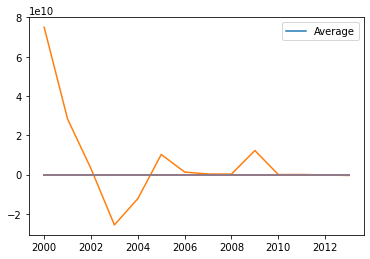

In [31]:
rollingMean = df_total.groupby('year').mean()
rollingMean

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Average'])
plt.show()

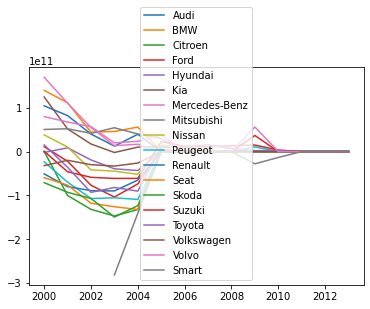

In [73]:
df_brand = df_total.copy()
df_brand = df_brand.sort_index()
df_brand['manufacturer'] = manufacturer_column
# df_brand_grouped = df_total.groupby(['manufacturer','year']).mean()
# df_brand_grouped

brands_to_show = [
    'Audi', 'BMW', 'Citroen', 'Ford', 'Hyundai', 'Kia', 'Mercedes-Benz',
    'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Suzuki', 'Toyota','Volkswagen', 
    'Volvo', 'Smart',
]

# for man in manufacturer_column.unique():
for man in brands_to_show:
    man_df = df_brand[df_brand['manufacturer'] == man]
    man_grouped = man_df.groupby('year').mean()
    plt.plot(man_grouped['tax_band'])

# plt.legend(manufacturer_column.unique())
plt.legend(brands_to_show)
plt.show()

# Sorry I'm stuck here and would like some help
I'm spend a lot of time trying to figure out why there's number in the negative/positive trillions here as that doesn't really make sense to me. Could you please help me out here?